In [38]:
import os
import pandas as pd

In [39]:
path = "C:/Users/User/OneDrive - University of Glasgow/University Year 4/Individual Project/2464980P-L4-Project/src/userStudies"

In [40]:
os.chdir(path)

In [41]:
correct_answers=[12,8,14,17,29,15,8,5,9,3,2,4]

In [42]:
attempts=[]

for file in os.listdir():
    file_path = f"{path}\{file}"
    print(file)
    with open(file_path, 'r') as f:
        attempts.append(f.read().split("\n"))

pandas_list=[]

for i in range(len(attempts)):
    answer_list=[]
    time_list=[]
    click_list=[]
    
    attempts[i]=[row.split(" ")[1:] for row in attempts[i] if "UserStudy" not in row and "START" not in row][:-1]
    for j in range(len(attempts[i])):
        attempts[i][j][0]=attempts[i][j][0].split(":")
        if j==0:
            start=(int(attempts[i][j][0][0])*60*60)+(int(attempts[i][j][0][1])*60)+int(attempts[i][j][0][2])
        attempts[i][j][0]=(int(attempts[i][j][0][0])*60*60)+(int(attempts[i][j][0][1])*60)+int(attempts[i][j][0][2])-start
        
    clicks=1
    time=0
    answer=0
    for click in attempts[i]:
        if "Q" in click[1]:
            answer_list.append(int(click[1].split(":")[1]))
            time_list.append(int(click[0]-time))
            click_list.append(int(clicks))
            clicks=0
        clicks+=1
        time=click[0]
    
    attempt_pd=pd.DataFrame({'Correct':correct_answers,'Answer':answer_list, 'Time':time_list, 'Click':click_list})
    attempt_pd['Error']=(attempt_pd['Correct']-attempt_pd['Answer'])
    attempt_pd=attempt_pd.drop(columns=['Correct','Answer'],axis=1)
    pandas_list.append(attempt_pd)

baseline1
baseline2
noabstracts1
noabstracts2
nohighlighting1
nohighlighting2
noplots1
noplots2
nosearch1
nosearch2


In [43]:
baselines = [pandas_list[0],pandas_list[1]]
baselines = pd.concat([each.stack() for each in baselines],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
baselines

,Time,Click,Error
0,23.0,3.0,0.0
1,16.0,3.0,1.0
2,17.0,3.0,4.0
3,79.5,3.0,0.0
4,126.0,3.5,-0.5
5,53.5,3.0,0.5
6,13.5,3.0,0.0
7,10.0,3.0,0.0
8,10.5,3.0,0.0
9,6.5,2.0,0.0


In [44]:
# NO SEARCH
#pandas_list[8].iloc[9:12]
pandas_list[9].iloc[9:12]

,Time,Click,Error
9,18,3,-16
10,24,2,0
11,25,3,0


In [45]:
#BASELINE
#pandas_list[0].iloc[9:12]
pandas_list[1].iloc[9:12]

,Time,Click,Error
9,6,2,0
10,11,5,0
11,6,4,0


In [46]:
no_abstracts = [pandas_list[2],pandas_list[3]]
no_abstracts = pd.concat([each.stack() for each in no_abstracts],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()

print("Entity Abstracts")
no_abstracts=no_abstracts.iloc[3:6].sub(baselines.iloc[3:6])
no_abstracts['Error']=(no_abstracts['Error']**2)**0.5


Entity Abstracts


In [47]:
no_highlighting = [pandas_list[4],pandas_list[5]]
no_highlighting = pd.concat([each.stack() for each in no_highlighting],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()

print("Entity Highlighting")
no_highlighting=no_highlighting.iloc[0:3].sub(baselines.iloc[0:3])
no_highlighting['Error']=(no_highlighting['Error']**2)**0.5


Entity Highlighting


In [48]:
no_plots = [pandas_list[6],pandas_list[7]]
no_plots = pd.concat([each.stack() for each in no_plots],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()

print("Entity Plots")
no_plots=no_plots.iloc[6:9].sub(baselines.iloc[6:9])
no_plots['Error']=(no_plots['Error']**2)**0.5


Entity Plots


In [49]:
no_search = [pandas_list[8],pandas_list[9]]
no_search = pd.concat([each.stack() for each in no_search],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()

print("Search Bar")
no_search=no_search.iloc[9:12].sub(baselines.iloc[9:12])
no_search['Error']=(no_search['Error']**2)**0.5


Search Bar


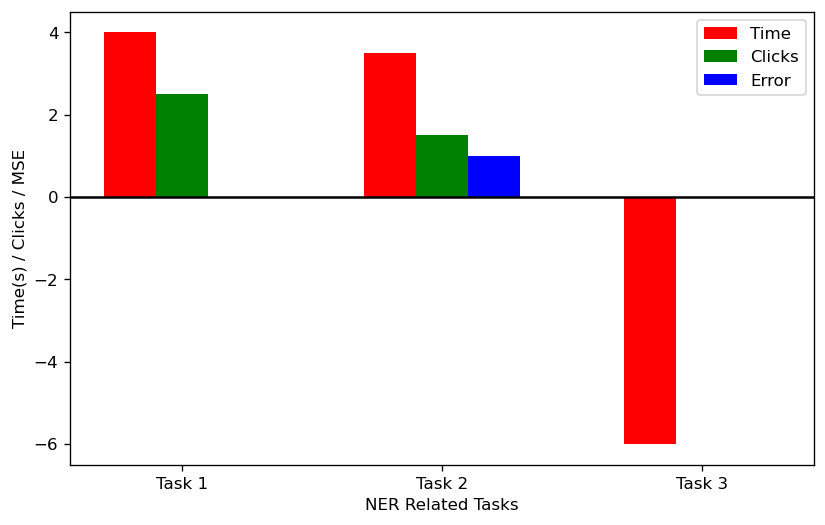

In [50]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(8, 5), dpi=120)
#fig.suptitle('No NER - User Study Performance', fontsize=16)
ax = fig.add_subplot(111)

yvals = no_highlighting['Time']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = no_highlighting['Click']
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = no_highlighting['Error']
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

plt.axhline(y=0, color='black', linestyle='-')

ax.set
ax.set_ylabel('Time(s) / Clicks / MSE')
ax.set_xlabel('NER Related Tasks')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Task 1', 'Task 2', 'Task 3') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Time', 'Clicks', 'Error') )

plt.show()

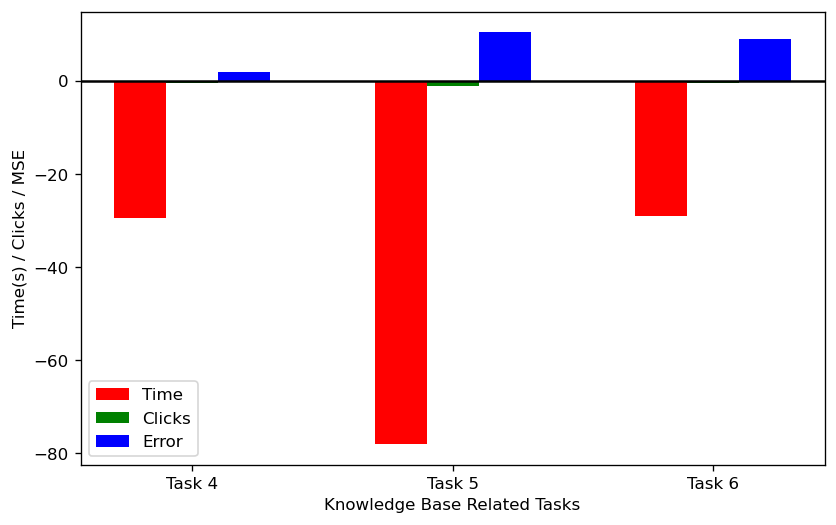

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(8, 5), dpi=120)
#fig.suptitle('No Knowledge Base - User Study Performance', fontsize=16)
ax = fig.add_subplot(111)

yvals = no_abstracts['Time']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = no_abstracts['Click']
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = no_abstracts['Error']
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

plt.axhline(y=0, color='black', linestyle='-')

ax.set
ax.set_ylabel('Time(s) / Clicks / MSE')
ax.set_xlabel('Knowledge Base Related Tasks')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Task 4', 'Task 5', 'Task 6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Time', 'Clicks', 'Error') )

plt.show()

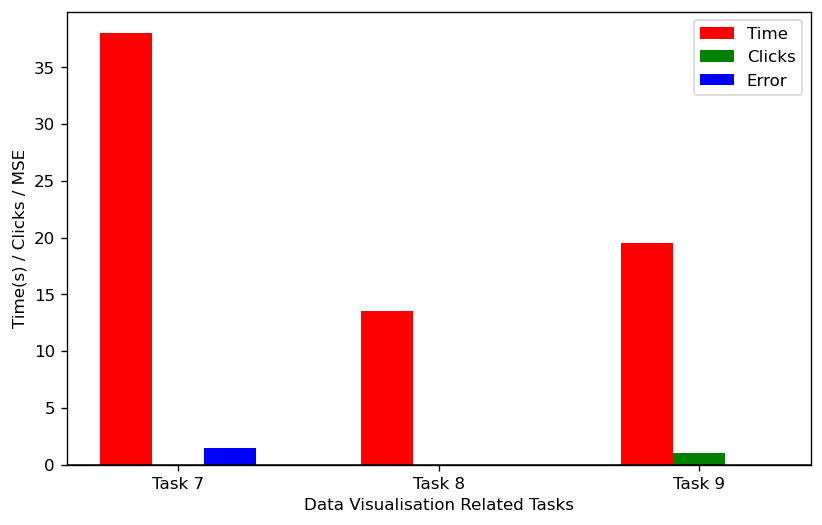

In [52]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(8, 5), dpi=120)
#fig.suptitle('No Data Visualisations - User Study Performance', fontsize=16)
ax = fig.add_subplot(111)

yvals = no_plots['Time']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = no_plots['Click']
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = no_plots['Error']
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

plt.axhline(y=0, color='black', linestyle='-')

ax.set
ax.set_ylabel('Time(s) / Clicks / MSE')
ax.set_xlabel('Data Visualisation Related Tasks')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Task 7', 'Task 8', 'Task 9') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Time', 'Clicks', 'Error') )

plt.show()

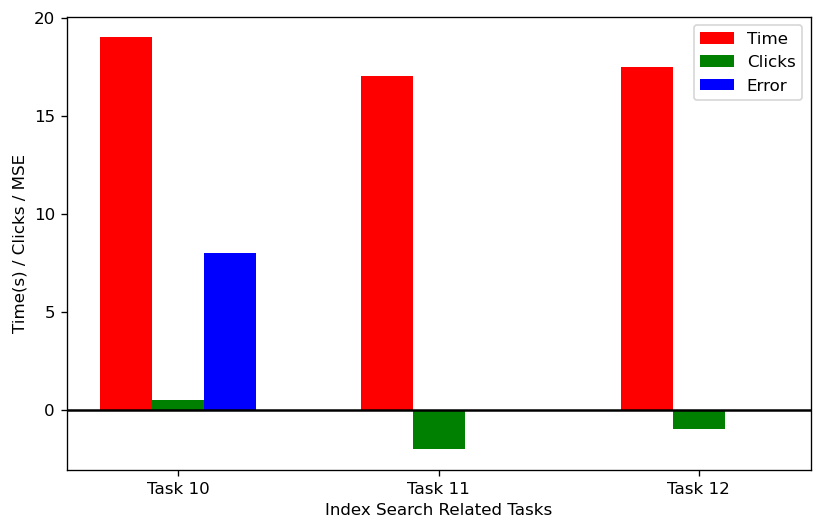

In [53]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(8, 5), dpi=120)
#fig.suptitle('No Index Search - User Study Performance', fontsize=16)
ax = fig.add_subplot(111)

yvals = no_search['Time']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = no_search['Click']
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = no_search['Error']
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

plt.axhline(y=0, color='black', linestyle='-')

ax.set
ax.set_ylabel('Time(s) / Clicks / MSE')
ax.set_xlabel('Index Search Related Tasks')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Task 10', 'Task 11', 'Task 12') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Time', 'Clicks', 'Error') )

plt.show()

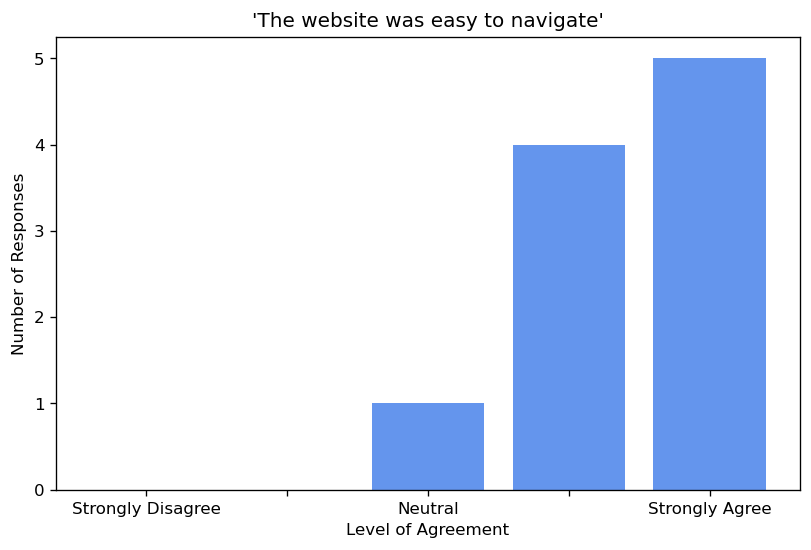

In [63]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,1,4,5]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The website was easy to navigate'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

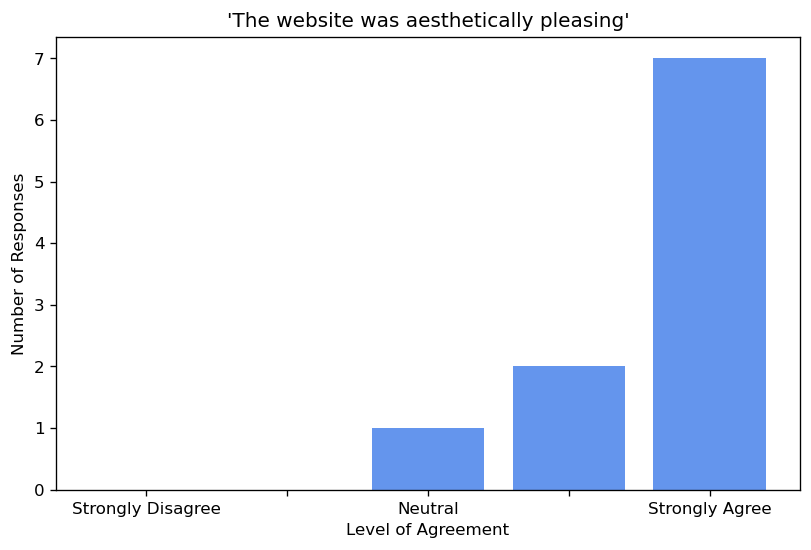

In [64]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,1,2,7]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The website was aesthetically pleasing'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

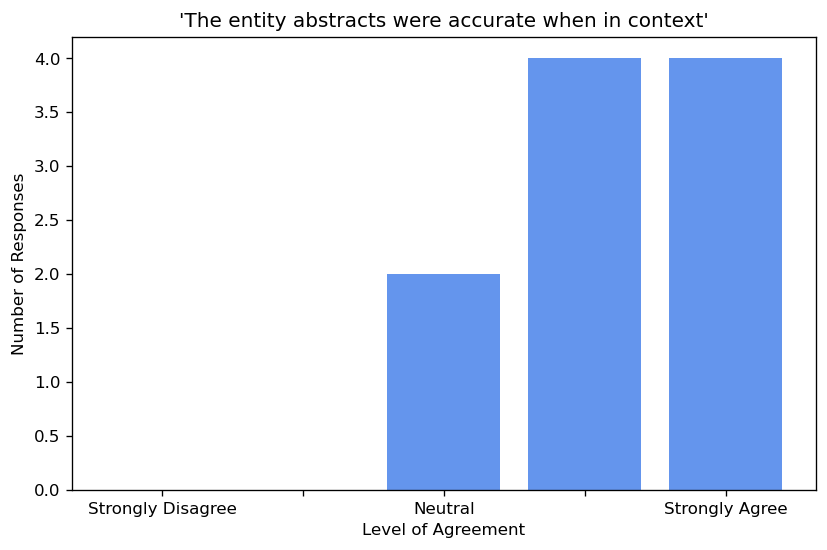

In [66]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,2,4,4]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The entity abstracts were accurate when in context'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

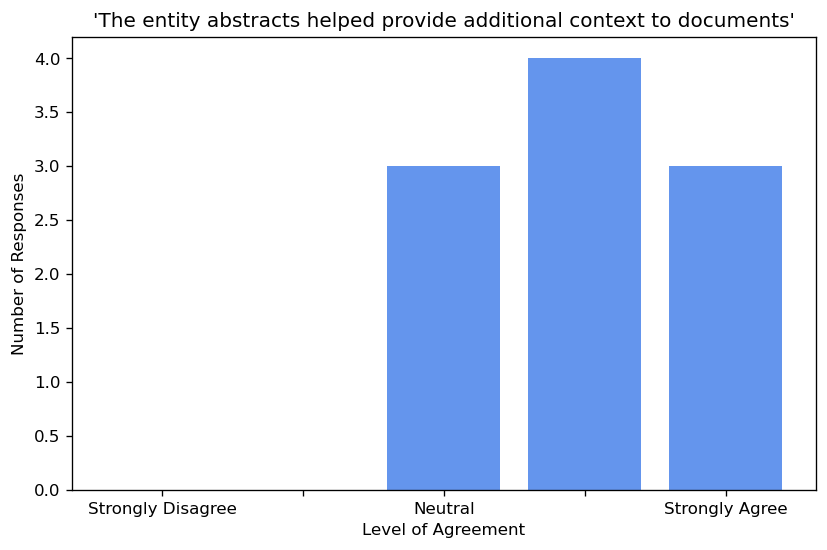

In [67]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,3,4,3]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The entity abstracts helped provide additional context to documents'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

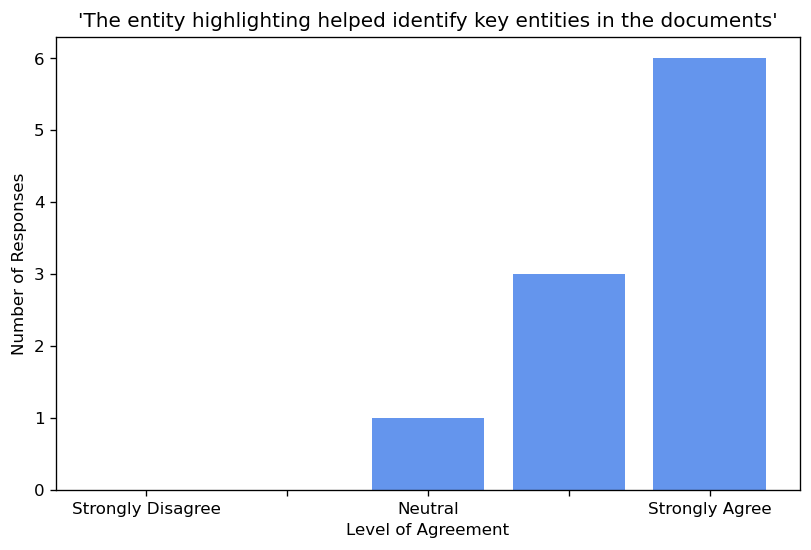

In [68]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,1,3,6]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The entity highlighting helped identify key entities in the documents'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

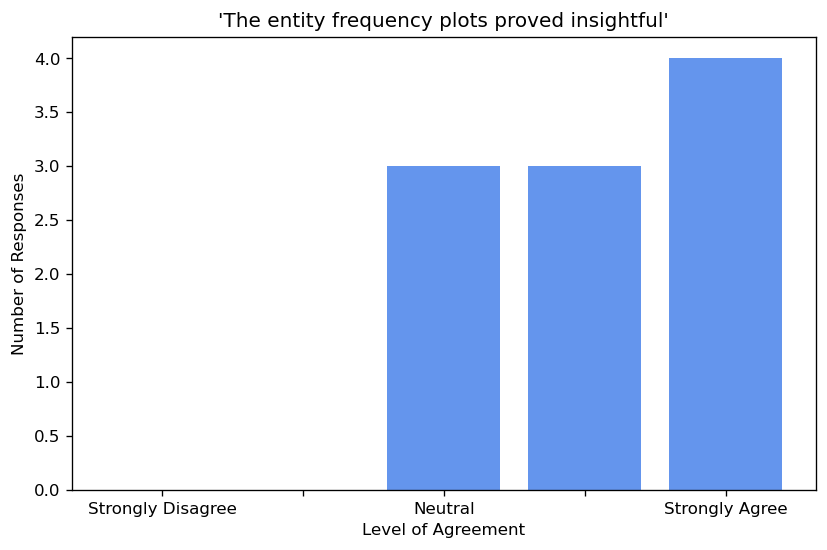

In [69]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,3,3,4]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The entity frequency plots proved insightful'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()

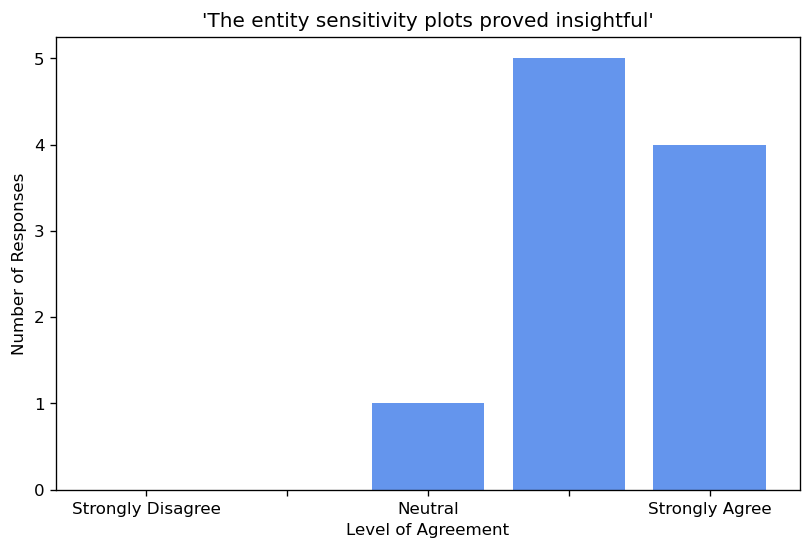

In [70]:
x = ["Strongly Disagree","","Neutral","","Strongly Agree"]
y = [0,0,1,5,4]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x_pos, y, color='cornflowerblue')
plt.title("'The entity sensitivity plots proved insightful'")
plt.ylabel("Number of Responses")
plt.xlabel("Level of Agreement")
plt.xticks(x_pos, x)

plt.show()